### Additional Data Transform Examples

### Introduction to Data Science
### Last Updated: December 19, 2022
---  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Scaling

Example illustrating how scaling data with wide range of order of magnitude can help visualization

In [6]:
x = range(0,6)
y = [10,10,10,20,20,10000]

In [7]:
len(x)

6

Text(0, 0.5, 'y')

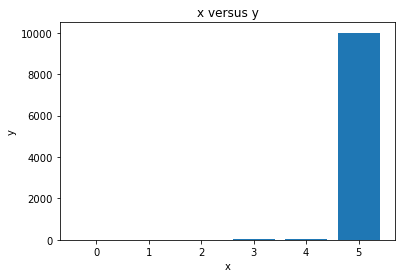

In [8]:
plt.bar(x,y)
plt.title('x versus y')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'log(y)')

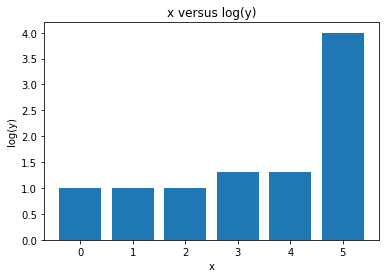

In [9]:
plt.bar(x,np.log10(y))
plt.title('x versus log(y)')
plt.xlabel('x')
plt.ylabel('log(y)')

In [10]:
np.log10(y)

array([1.     , 1.     , 1.     , 1.30103, 1.30103, 4.     ])

#### Treating Noise with Moving Average

Example: Stock Simulation

In [13]:
import random

In [14]:
x0 = 100
sigma = 10
prices = [x0]
steps = 100

In [15]:
for step in range(steps):
    val = x0 + sigma * np.random.normal(0)
    prices += [val]
    x0 = val

In [16]:
len(range(steps))
len(prices)

101

Text(0, 0.5, 'stock price')

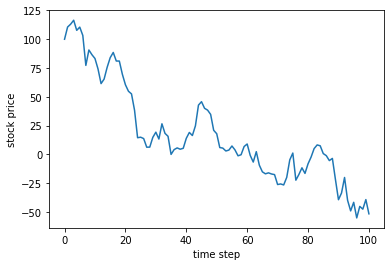

In [17]:
plt.plot(range(steps+1), prices)
plt.xlabel('time step')
plt.ylabel('stock price')

In [18]:
df = pd.DataFrame({'time':range(steps+1), 'price':prices})
df

,time,price
0,0,100.000000
1,1,110.576801
2,2,113.062862
3,3,116.478050
4,4,107.717150
...,...,...
96,96,-55.051385
97,97,-45.052638
98,98,-47.452267
99,99,-39.153404


In [19]:
df['ma10'] = df.price.rolling(10).mean()
df['ma20'] = df.price.rolling(20).mean()

In [20]:
df

,time,price,ma10,ma20
0,0,100.000000,NaN,NaN
1,1,110.576801,NaN,NaN
2,2,113.062862,NaN,NaN
3,3,116.478050,NaN,NaN
4,4,107.717150,NaN,NaN
...,...,...,...,...
96,96,-55.051385,-30.833836,-17.169211
97,97,-45.052638,-34.808872,-18.554625
98,98,-47.452267,-39.212837,-20.348553
99,99,-39.153404,-40.965399,-21.484990


Text(0, 0.5, 'stock price')

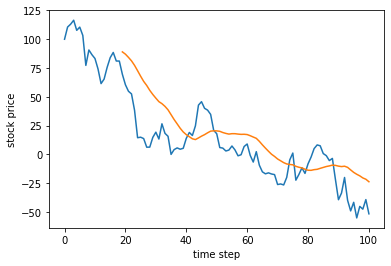

In [21]:
plt.plot(range(steps+1), df['price'])
plt.plot(range(steps+1), df['ma20'])
plt.xlabel('time step')
plt.ylabel('stock price')

#### Winsorizing data

In [22]:
from scipy.stats.mstats import winsorize
from scipy import stats

In [23]:
# 80% winsorization

data_win = [-1000, 1,2,3,4,5,6,7,8,9,1000]
winsorize(data_win, limits=[0.1, 0.1])

masked_array(data=[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9],
             mask=False,
       fill_value=999999)

In [24]:
print(np.mean(data_win)) # not robust to outliers
print(np.mean(winsorize(data_win, limits=[0.1, 0.1]))) 

4.090909090909091
5.0


In [25]:
np.mean([1,2,3,4,5,6,7,8,9]) # if we excluded the outliers

5.0

#### Trimming data

Trimming drops data, which is different from winsorization

In [26]:
stats.trim_mean(data_win, 0.2)

5.0

#### Standardizing data

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# create an array with four rows and two columns (variables)
data = np.array([[4, 4], [6, 0], [0, 2], [1, 1]])
scaler = StandardScaler() # set up the scaler
scaled_data = scaler.fit_transform(data)

print(data)
print('')
print(scaled_data)

[[4 4]
 [6 0]
 [0 2]
 [1 1]]

[[ 0.52414242  1.52127766]
 [ 1.36277029 -1.18321596]
 [-1.15311332  0.16903085]
 [-0.73379939 -0.50709255]]


In [28]:
print(data.mean(axis=0))

[2.75 1.75]


In [57]:
print(data.std(axis=0))

[2.384848   1.47901995]


In [58]:
(4-2.75) / 2.384848

0.5241424191395008

In [63]:
print(np.mean(scaled_data, axis=0))
print(np.std(scaled_data, axis=0))

[-5.55111512e-17  0.00000000e+00]
[1. 1.]


#### Normalizing data

In [59]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# set up the scaler
scaler = MinMaxScaler()

# normalize the data
norm_data = scaler.fit_transform(data) 

print(norm_data)

[[0.66666667 1.        ]
 [1.         0.        ]
 [0.         0.5       ]
 [0.16666667 0.25      ]]


#### Binarization

In [71]:
from sklearn.preprocessing import Binarizer
import numpy as np

# create an array with four rows and two columns (variables)
data = np.array([[4, 4], [6, 0], [0, 2], [1, 1]])

# set up the scaler
bin = Binarizer()

bin_data = bin.fit_transform(data) 

print(data)
print('')
print(bin_data)


[[4 4]
 [6 0]
 [0 2]
 [1 1]]

[[1 1]
 [1 0]
 [0 1]
 [1 1]]


#### Discretization

Generate random data with wide range, and then decile it.

In [10]:
data = 100*np.random.normal(size=1000)
data.sort()
data_dec = pd.qcut(data, q=10, labels=False)

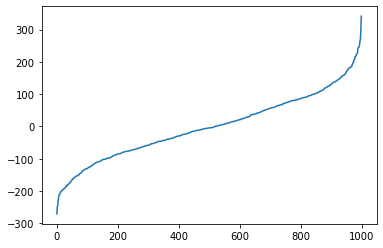

In [11]:
plt.plot(data)

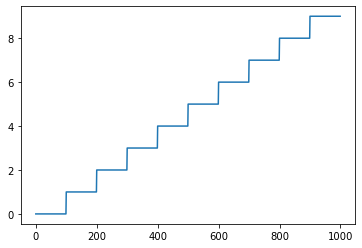

In [12]:
plt.plot(data_dec)